In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from decimal import *
np.random.seed(25)
import random

In [43]:
def count_time(fun):
    l =[]
    for i in range(1, 2001):
        s=0
        for t in range(5):
            v = np.random.randint(1, 50, i)
            start_time = time.time()
            fun(v)
            end_time = time.time()
            s = s + end_time - start_time
        l.append(s/5)
    return l
def count_time_quick(fun):
    l =[]
    for i in range(1, 2001):
        s=0
        for t in range(5):
            v = np.random.randint(1, 50, i)
            start_time = time.time()
            fun(v,0,v.size-1)
            end_time = time.time()
            s = s + end_time - start_time
        l.append(s/5)
    return l
def count_time_poly(fun):
    l =[]
    for i in range(1, 2001):
        s=0
        for t in range(5):
            v = np.random.randint(1, 50, i)
            start_time = time.time()
            fun(decimal.Decimal(1.5),v)
            end_time = time.time()
            s = s + end_time - start_time
        l.append(s/5)
    return l

In [3]:
def count_time_matrix():
    l =[]
    for i in range(1, 2001):
        A=np.random.rand(i,i)
        B=np.random.rand(i,i)
        s=0
        for t in range(5):
            start_time = time.time()
            C=np.matmul(A,B)
            end_time = time.time()
            s = s + end_time - start_time
        l.append(s/5)
    return l

In [44]:
def constant(vector):
    return 1
def summa(vector):
    s=0
    for i in range(vector.size):
        s=s+vector[i]
    return s
def product(vector):
    f3 = np.ones_like(vector, dtype=np.float128)
    f3[0] = vector[0]
    for i in range(1,len(vector)):
        f3[i] = f3[i-1] * vector[i]
    return f3[-1]

def poly(a, vector):
    s=decimal.Decimal(0)
    for i in range(vector.size):
        s=s+vector[i]*(a**i)
    return s
def horner(a, vector):
    if vector.size!=1:
        return vector[0]+a*horner(a,vector[1:vector.size])
    else:
        return vector[0]
def bubble_sort(vector):
    for i in range(vector.size-1):
        for j in range(vector.size-1,i,-1):
            if vector[j]<vector[j-1]:
                vector[j],vector[j-1]=vector[j-1],vector[j]
    return vector
def quicksort(nums, fst, lst):
   if fst >= lst: return
 
   i, j = fst, lst
   pivot = nums[random.randint(fst, lst)]
 
   while i <= j:
       while nums[i] < pivot: i += 1
       while nums[j] > pivot: j -= 1
       if i <= j:
           nums[i], nums[j] = nums[j], nums[i]
           i, j = i + 1, j - 1
   quicksort(nums, fst, j)
   quicksort(nums, i, lst)
MINIMUM= 32
def find_minrun(n): 
    r = 0
    while n >= MINIMUM: 
        r |= n & 1
        n >>= 1
    return n + r 
def insertion_sort(array, left, right): 
    for i in range(left+1,right+1):
        element = array[i]
        j = i-1
        while element<array[j] and j>=left :
            array[j+1] = array[j]
            j -= 1
        array[j+1] = element
    return array          
def merge(array, l, m, r): 
    array_length1= m - l + 1
    array_length2 = r - m 
    left = []
    right = []
    for i in range(0, array_length1): 
        left.append(array[l + i]) 
    for i in range(0, array_length2): 
        right.append(array[m + 1 + i]) 
    i=0
    j=0
    k=l
    while j < array_length2 and  i < array_length1: 
        if left[i] <= right[j]: 
            array[k] = left[i] 
            i += 1
        else: 
            array[k] = right[j] 
            j += 1
        k += 1
    while i < array_length1: 
        array[k] = left[i] 
        k += 1
        i += 1
    while j < array_length2: 
        array[k] = right[j] 
        k += 1
        j += 1
def tim_sort(array): 
    n = len(array) 
    minrun = find_minrun(n) 
    for start in range(0, n, minrun): 
        end = min(start + minrun - 1, n - 1) 
        insertion_sort(array, start, end) 
    size = minrun 
    while size < n: 
        for left in range(0, n, 2 * size): 
            mid = min(n - 1, left + size - 1) 
            right = min((left + 2 * size - 1), (n - 1)) 
            merge(array, left, mid, right) 
        size = 2 * size
    return array

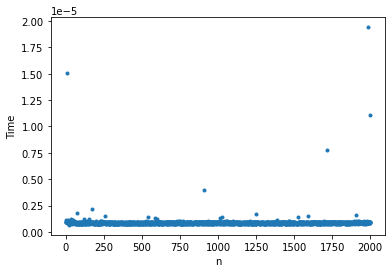

In [42]:
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time(constant),'.', label='const')

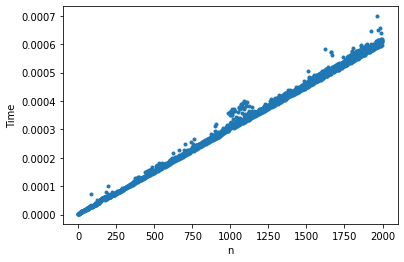

In [52]:
getcontext().prec = 5
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time(summa),'.', label='summa')

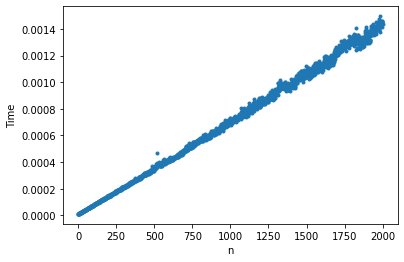

In [54]:
getcontext().prec = 2
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time(product),'.', label='product')

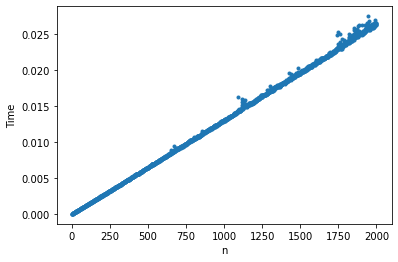

In [55]:
getcontext().prec = 10
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time_poly(poly),'.', label='poly')

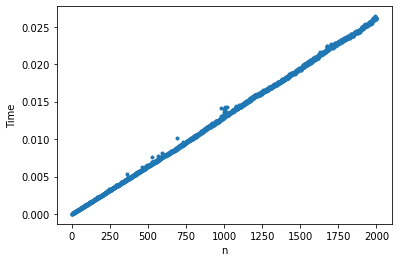

In [56]:
getcontext().prec = 10
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time_poly(horner),'.', label='horner')

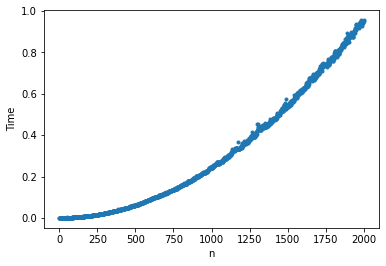

In [57]:
getcontext().prec = 2
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time(bubble_sort),'.')

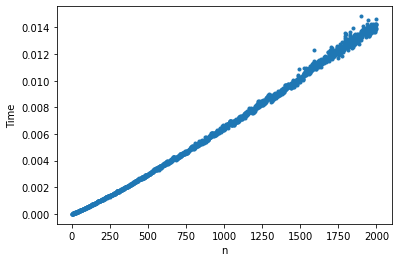

In [45]:
getcontext().prec = 5
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time_quick(quicksort),'.')

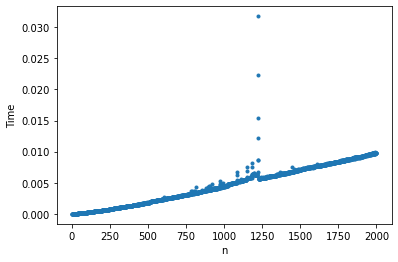

In [71]:
getcontext().prec = 5
plt.xlabel('n')
plt.ylabel('Time')
plt.plot(count_time(tim_sort),'.')

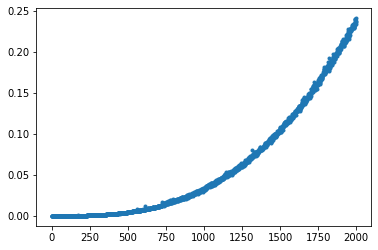

In [35]:
plt.plot(count_time_matrix(),'.')